In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

scale = False

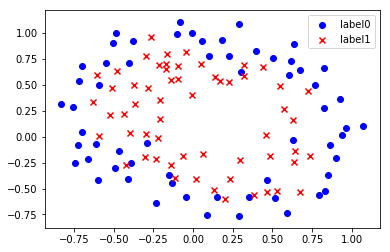

In [4]:
data = np.genfromtxt("LR-testSet2.txt",delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])

    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot()
plt.show()

In [6]:
#定义多项式回归，degree的值可以调节多项式的特征

poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_data)


In [8]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))


def cost(xMat,yMat,ws):
    left = np.multiply(yMat,np.log(sigmoid(xMat*ws)))
    right = np.multiply(1-yMat,np.log(1-sigmoid(xMat*ws)))
    
    return np.sum(left+right)/-(len(xMat))

def gradAscent(xArr,yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.03
    epoches = 50000
    costList = []
    
    m,n = np.shape(xMat)
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epoches+1):
        h = sigmoid(xMat*ws)
        
        ws_grad = xMat.T * (h-yMat)/m
        ws = ws - lr*ws_grad
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList


In [9]:
ws,costList = gradAscent(x_poly,y_data)
print(ws)

[[ 4.16787292]
 [ 2.72213524]
 [ 4.55120018]
 [-9.76109006]
 [-5.34880198]
 [-8.51458023]
 [-0.55950401]
 [-1.55418165]
 [-0.75929829]
 [-2.88573877]]


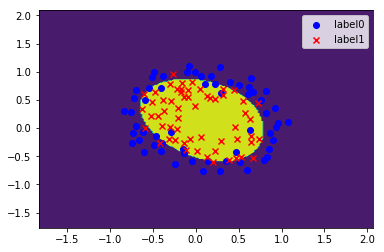

In [11]:
x_min,x_max = data[:,0].min()-1,x_data[:,0].max()+1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                 np.arange(y_min,y_max,0.02))

z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(),yy.ravel()]).dot(np.array(ws)))

for i in range(len(z)):
    if z[i] > 0.5:
        z[i] = 1
    else:
        z[i] = 0
z = z.reshape(xx.shape)

cs = plt.contourf(xx,yy,z)
plot()
plt.show()

In [12]:
def predict(x_data,ws):
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if y >= 0.5 else 0 for y in sigmoid(xMat*ws)]

prediction = predict(x_poly,ws)

print(classification_report(y_data,prediction))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85        60
         1.0       0.83      0.86      0.85        58

   micro avg       0.85      0.85      0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.85      0.85      0.85       118

